In [1]:
import networkx as nx
import community
from igraph import Graph
import igraph as ig
from igraph import VertexCover

import numpy as np
import math

import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score

import time
from datetime import datetime

In [2]:
def powerLawNet(n, m, algorithm):
    
    sizes = np.logspace(1, np.log10(n), num=10).astype(int)
    num_communities = []
    modularities = []
    conductances = []
    execution_times = []
    
    G = nx.barabasi_albert_graph(n, m)
    nx.write_gml(G, "ScaleFree.gml")

    print("No. of nodes: ", G.number_of_nodes())
    print("No. of edges: ", G.number_of_edges())
    
    for size in sizes:
        subgraph = G.subgraph(list(G.nodes)[:size])
        
        nx.write_gml(subgraph, "temp.gml")
        tempG = ig.Graph.Read_GML("temp.gml")

        start_time = time.time()
        
        if algorithm == "Infomap":
            infomap = tempG.community_infomap()
            
            community = len(set(infomap.membership))
            num_communities.append(community)
            tempG.vs["community"] = infomap
            
            module = infomap.modularity
            modularities.append(module)          
            
            conductance = tempG.average_path_length() / tempG.diameter()
            conductances.append(conductance)
                
            infomapSizes = infomap.sizes()
            #Create a bar plot of the community size distribution
            fig, ax = plt.subplots()
            ax.bar(range(len(infomapSizes)), infomapSizes)
            ax.set_xlabel('Community ID')
            ax.set_ylabel('Community size')
            ax.set_title('Infomap community size distribution')
            plt.show()

            
        elif algorithm == "Multilevel":
            multilevel = tempG.community_multilevel()
            
            community = len(set(multilevel.membership))
            num_communities.append(community)
            tempG.vs["community"] = multilevel
            
            module = multilevel.modularity
            modularities.append(module)
            
            conductance = tempG.average_path_length() / tempG.diameter()
            conductances.append(conductance)

            multilevelSizes = multilevel.sizes()

            fig, ax = plt.subplots()
            ax.bar(range(len(multilevelSizes)), multilevelSizes)
            ax.set_xlabel('Community ID')
            ax.set_ylabel('Community size')
            ax.set_title('Multilevel community size distribution')
            plt.show()
            
            
        elif algorithm == "Label Propagation":
            labelpropagation = tempG.community_label_propagation()
            
            community = len(set(labelpropagation.membership))
            num_communities.append(community)
            tempG.vs["community"] = labelpropagation
            
            module = labelpropagation.modularity
            modularities.append(module)
        
            conductance = tempG.average_path_length() / tempG.diameter()
            conductances.append(conductance)
           
            labelpropagationSizes = labelpropagation.sizes()
            fig, ax = plt.subplots()
            ax.bar(range(len(labelpropagationSizes)), labelpropagationSizes)
            ax.set_xlabel('Community ID')
            ax.set_ylabel('Community size')
            ax.set_title('Label Propagation community size distribution')

            plt.show()
            
        elif algorithm == "Walktrap":
            walktrap = tempG.community_walktrap()
            
            wtCommunities = walktrap.as_clustering()
            community = len(wtCommunities)
            num_communities.append(community)
            tempG.vs["community"] = walktrap
            
            module = tempG.modularity(walktrap.as_clustering())
            modularities.append(module)
        
            conductance = tempG.average_path_length() / tempG.diameter()
            conductances.append(conductance)
        
            wt_clusters = walktrap.as_clustering()
            wtSizes = wt_clusters.sizes()

            fig, ax = plt.subplots()
            ax.bar(range(len(wtSizes)), wtSizes)
            ax.set_xlabel('Community ID')
            ax.set_ylabel('Community size')
            ax.set_title('Walktrap community size distribution')

            plt.show()
            
        else:
            fastgreedy = tempG.community_fastgreedy()
            
            fgCommunities = fastgreedy.as_clustering()
            community = len(fgCommunities)
            num_communities.append(community)
            tempG.vs["community"] = fastgreedy
            
            module = tempG.modularity(fastgreedy.as_clustering())
            modularities.append(module)
           
            conductance = tempG.average_path_length() / tempG.diameter()
            conductances.append(conductance)
            
            fg_clusters = fastgreedy.as_clustering()
            fgSizes = fg_clusters.sizes()

            fig, ax = plt.subplots()
            ax.bar(range(len(fgSizes)), fgSizes)
            ax.set_xlabel('Community ID')
            ax.set_ylabel('Community size')
            ax.set_title('FastGreedy community size distribution')

            plt.show()
            
        execution_time = time.time() - start_time
        execution_times.append(execution_time)

    return num_communities, modularities, algorithm, sizes, conductances, execution_times

In [3]:
def plot_communities(num_communities, algorithm_list, sizes):
    
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(num_communities_list)):
        plt.plot(sizes, num_communities_list[i], '-o', label=algorithm_list[i])
        
    plt.xscale('log')
    plt.xlabel('Number of nodes')
    plt.ylabel('Number of communities')
    plt.title('Comparative Analysis : No. of communities detected')
    plt.legend(loc='best')
    
    for i, label in enumerate(algorithm_list):
        plt.annotate(label, (1,1), xytext=(-15, -15*(i+1)), 
                     textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.8))    

In [4]:
def plot_modularities(modularities_list, algorithm_list, sizes):
    
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(modularities_list)):
        plt.plot(sizes, modularities_list[i], '-o', label=algorithm_list[i])
        
    plt.xscale('log')
    plt.xlabel('Number of nodes')
    plt.ylabel('Modularity')
    plt.title('Comparative Analysis : Modularity')
    plt.legend(loc='best')
    
    for i, label in enumerate(algorithm_list):
        plt.annotate(label, (1,1), xytext=(-15, -15*(i+1)), 
                     textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.8))
    

In [5]:
def plot_executiontime(executiontime_list, algorithm_list, sizes):
    
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(executiontime_list)):
        plt.plot(sizes, executiontime_list[i], '-o', label=algorithm_list[i])
        
    plt.xscale('log')
    plt.xlabel('Number of nodes')
    plt.ylabel('Execution Time')
    plt.title('Comparative Analysis : Execution Time')
    plt.legend(loc='best')
    
    for i, label in enumerate(algorithm_list):
        plt.annotate(label, (1,1), xytext=(-15, -15*(i+1)), 
                     textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.8))
    

In [6]:
def plot_conductance(conductance_list, algorithm_list, sizes):
    
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(conductance_list)):
        plt.plot(sizes, conductance_list[i], '-o', label=algorithm_list[i])
        
    plt.xscale('log')
    plt.xlabel('Number of nodes')
    plt.ylabel('Conductance')
    plt.title('Comparative Analysis : Conductance')
    plt.legend(loc='best')
    
    for i, label in enumerate(algorithm_list):
        plt.annotate(label, (1,1), xytext=(-15, -15*(i+1)), 
                     textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.8))
    

In [7]:
def plot_coverages(coverages_list, algorithm_list, sizes):
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(coverages_list)):
        plt.plot(sizes, coverages_list[i], '-o', label=algorithm_list[i])
        
    plt.xscale('log')
    plt.xlabel('Number of nodes')
    plt.ylabel('Coverage')
    plt.title('Comparative Analysis : Coverage')
    plt.legend(loc='best')
    
    for i, label in enumerate(algorithm_list):
        plt.annotate(label, (1,1), xytext=(-15, -15*(i+1)), 
                     textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.8))

No. of nodes:  5000
No. of edges:  9996


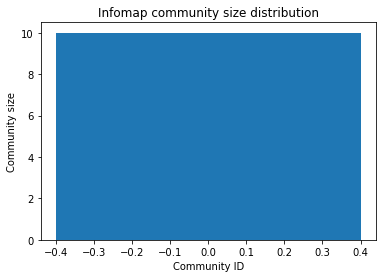

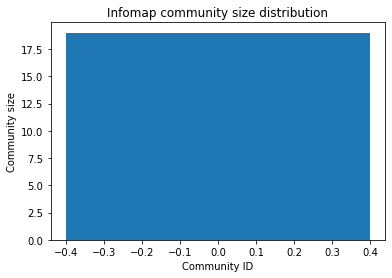

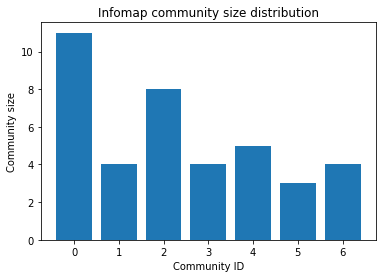

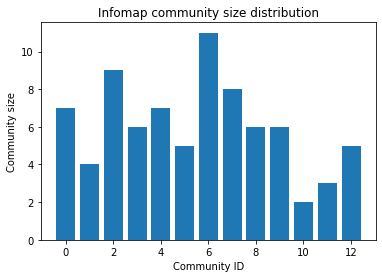

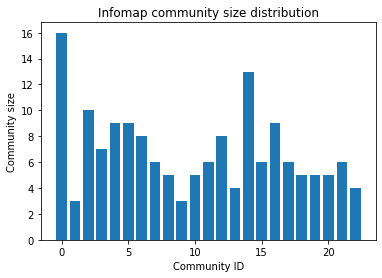

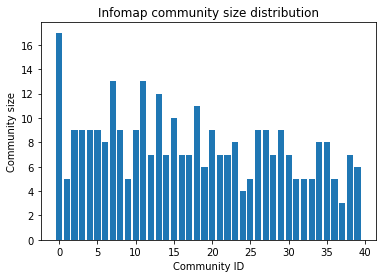

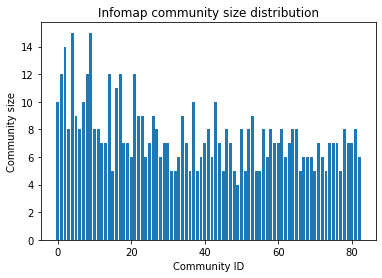

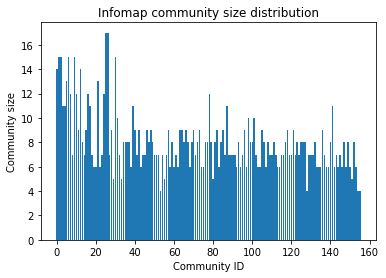

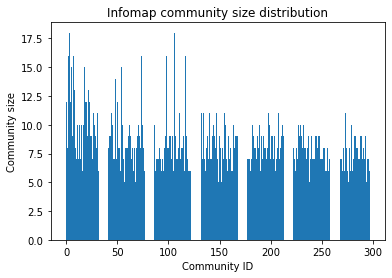

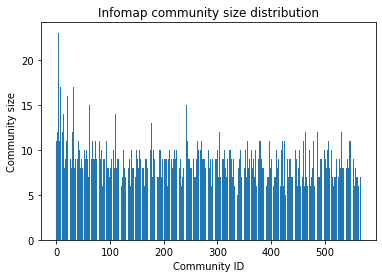

In [8]:
num_communities2, modularities2, algorithm2, sizes2, conductance2, executiontime2 = powerLawNet(5000, 2, "Infomap")

No. of nodes:  5000
No. of edges:  9996


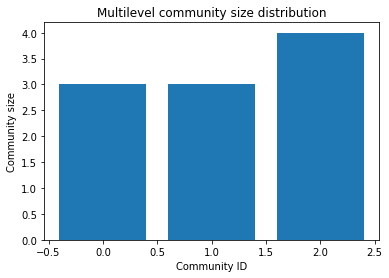

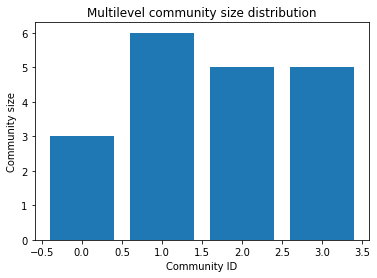

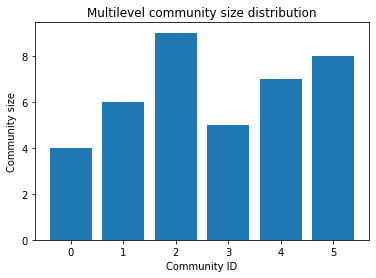

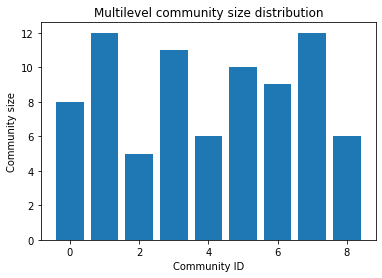

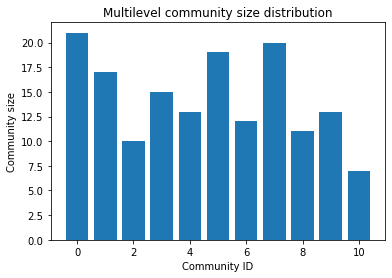

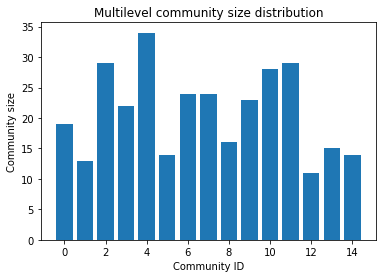

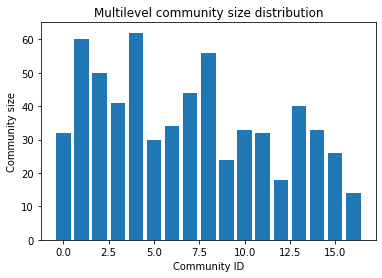

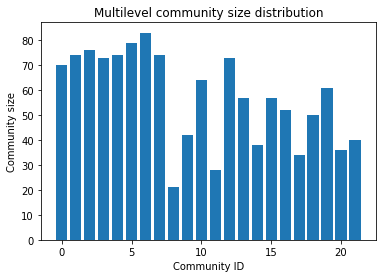

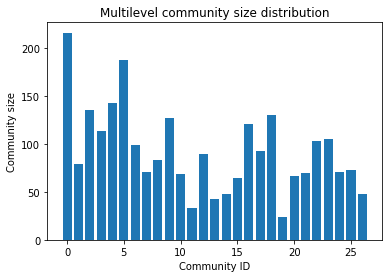

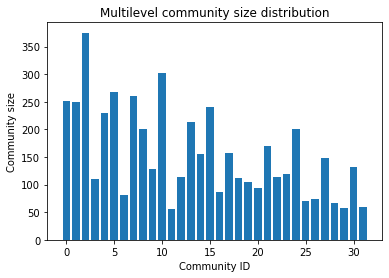

In [9]:
num_communities4, modularities4, algorithm4, sizes4, conductance4, executiontime4 = powerLawNet(5000, 2, "Multilevel")

No. of nodes:  5000
No. of edges:  9996


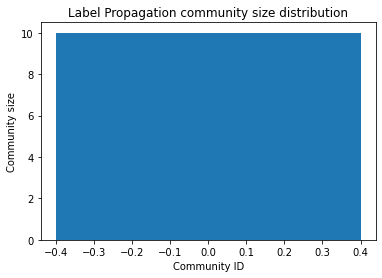

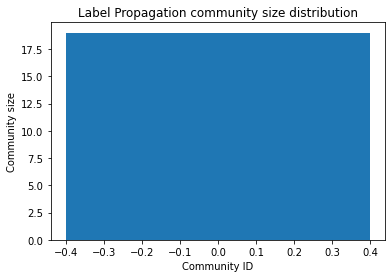

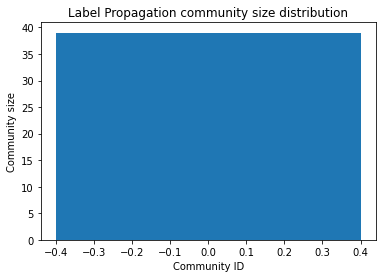

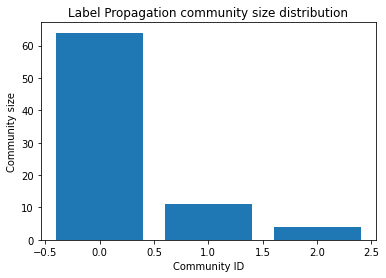

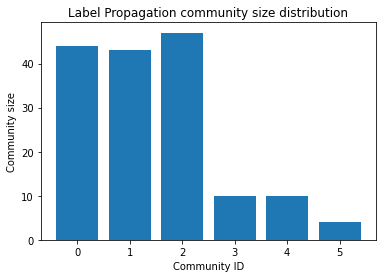

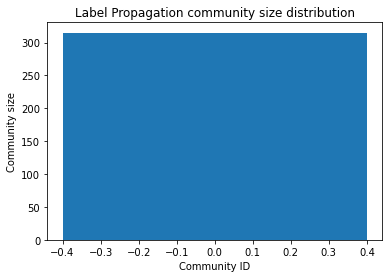

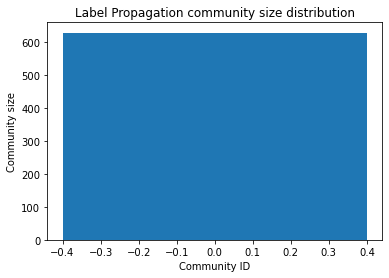

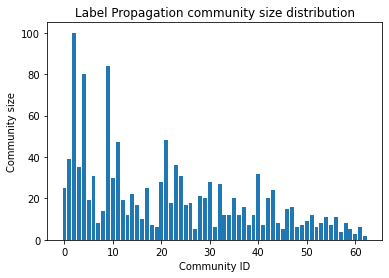

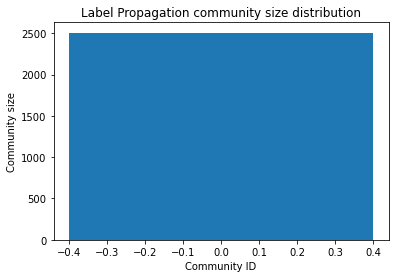

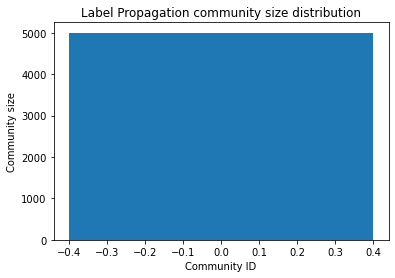

In [10]:
num_communities5, modularities5, algorithm5, sizes5, conductance5, executiontime5 = powerLawNet(5000, 2, "Label Propagation")

No. of nodes:  5000
No. of edges:  9996


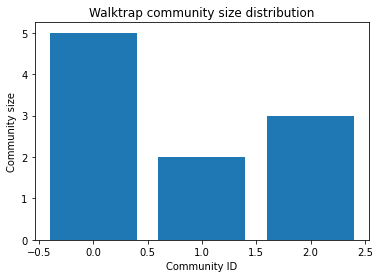

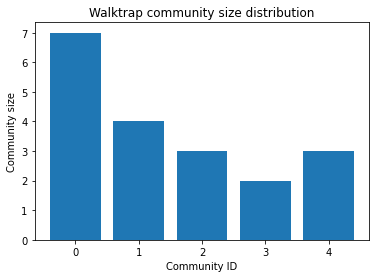

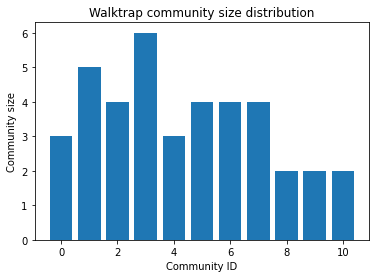

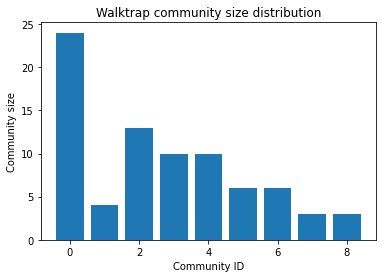

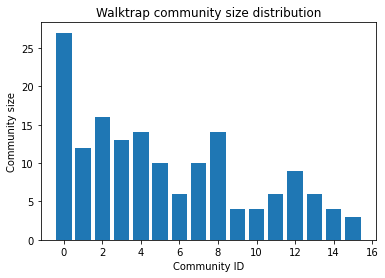

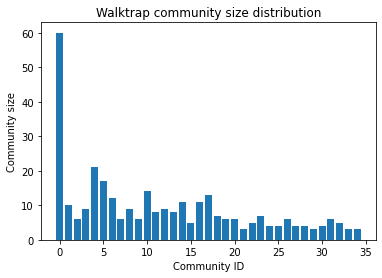

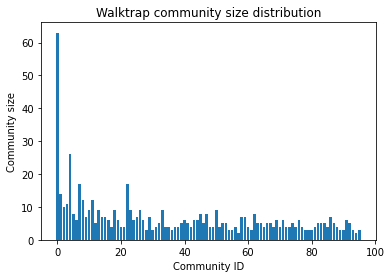

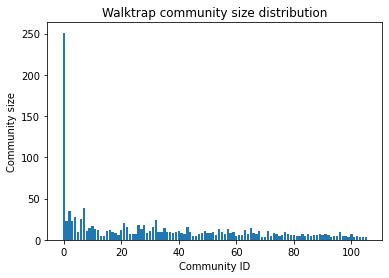

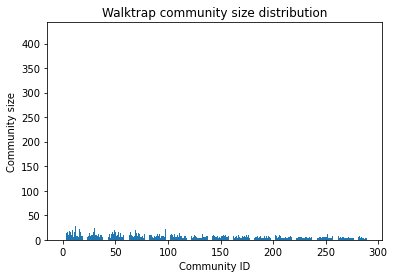

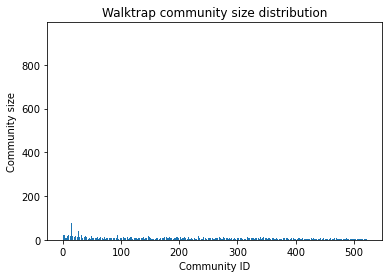

In [11]:
num_communities1, modularities1, algorithm1, sizes1, conductance1, executiontime1= powerLawNet(5000, 2, "Walktrap")

No. of nodes:  5000
No. of edges:  9996


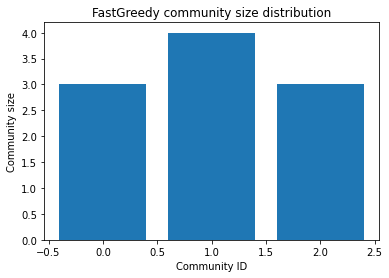

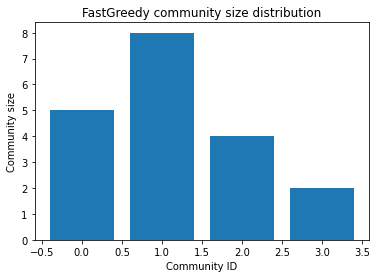

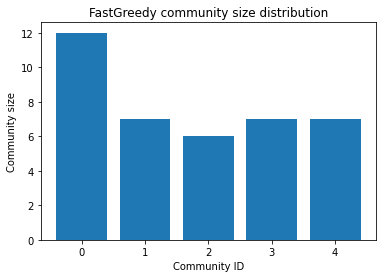

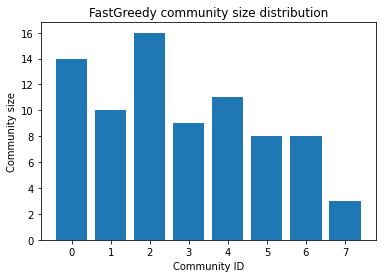

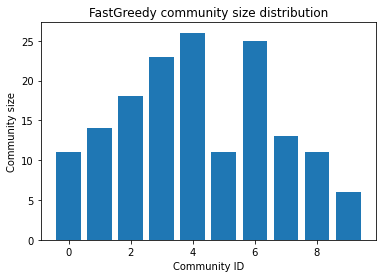

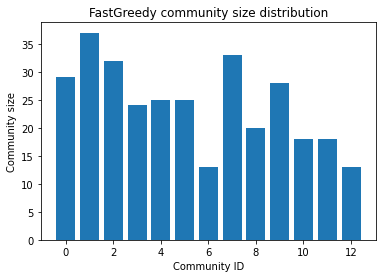

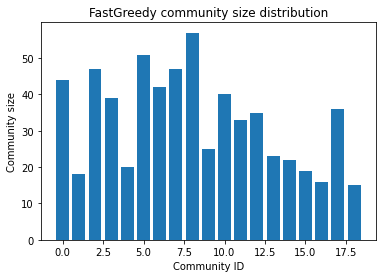

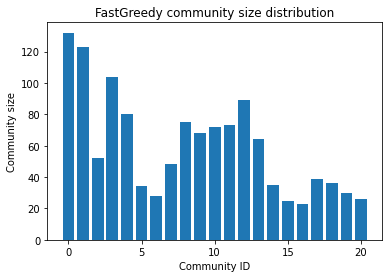

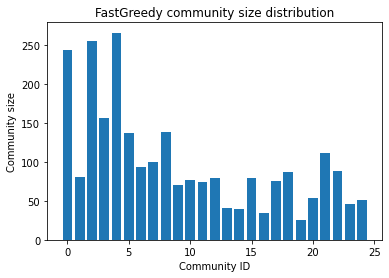

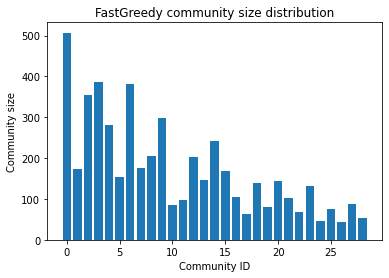

In [12]:
num_communities3, modularities3, algorithm3, sizes3, conductance3, executiontime3 = powerLawNet(5000, 2, "Fastgreedy")

In [13]:
algorithm_list = [algorithm1, algorithm2, algorithm3, algorithm4, algorithm5]

In [14]:
num_communities_list = [num_communities1, num_communities2, num_communities3, num_communities4, num_communities5]

In [15]:
modularities_list = [modularities1, modularities2, modularities3, modularities4, modularities5]

In [16]:
conductance_list = [conductance1, conductance2, conductance3, conductance4, conductance5]

In [17]:
executiontime_list = [executiontime1, executiontime2, executiontime3, executiontime4, executiontime5]

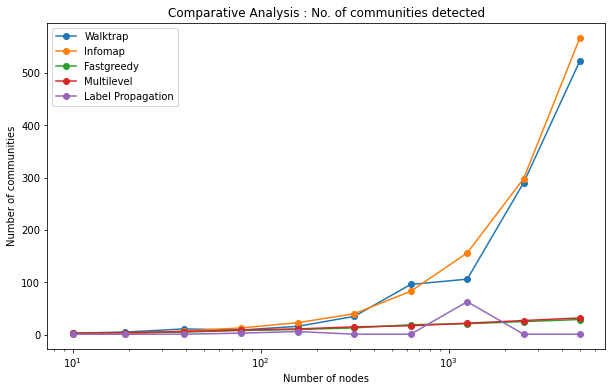

In [18]:
plot_communities(num_communities_list, algorithm_list, sizes1)

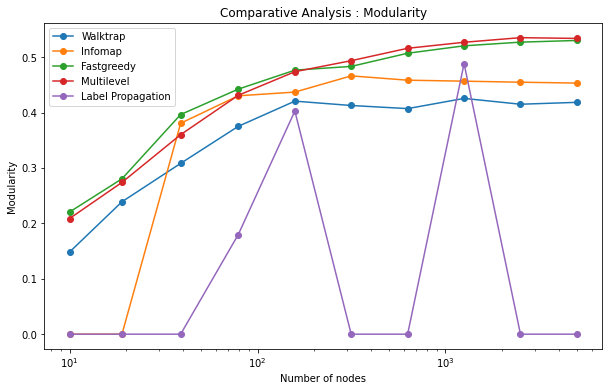

In [19]:
plot_modularities(modularities_list, algorithm_list, sizes1)

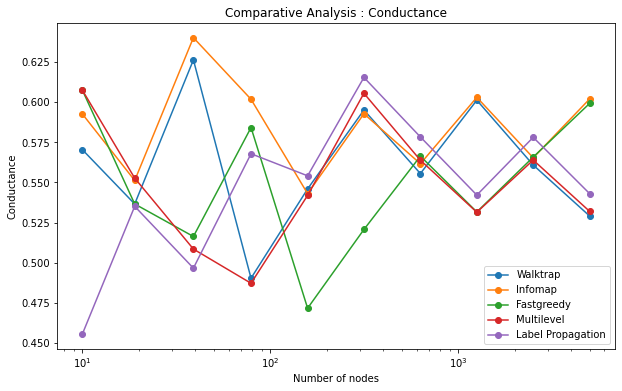

In [20]:
plot_conductance(conductance_list, algorithm_list, sizes1)

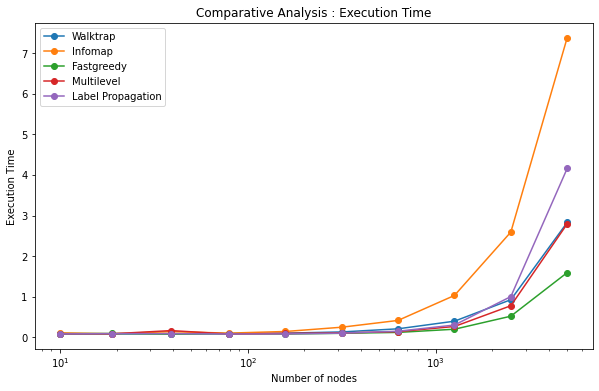

In [21]:
plot_executiontime(executiontime_list, algorithm_list, sizes1)